<a href="https://colab.research.google.com/github/Erssa001/ECGR_4105/blob/main/HW4_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn import metrics

from scipy import stats
import seaborn as sns; sns.set()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/2023-2024/ECGR_4105/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

bi_vars =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
dataset[bi_vars] = dataset[bi_vars].apply(binary_map)
# Preprocessing
scaler = StandardScaler()
dataset[num_vars] = scaler.fit_transform(dataset[num_vars])
#input & target initialization
components_to_use = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = dataset[components_to_use].values.copy()
Y = dataset.pop('price').values
X[0]

array([1.04672629, 1.40341936, 1.42181174, 1.37821692, 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.51769249,
       1.        ])

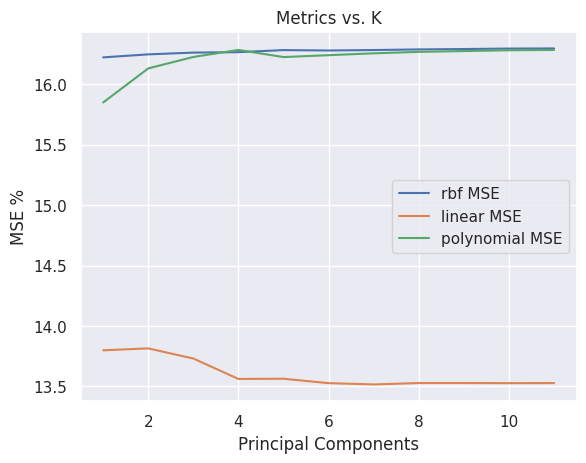

Best K (rbf) =  1.0  | MSE at best K (rbf) =  16.22372819386653
Best K (linear) =  7.0  | MSE at best K (linear) =  13.515017146728978
Best K (poly) =  1.0  | MSE at best K (poly) =  15.850332574827325


In [ ]:
feat_to_use = len(X[0])
K = np.zeros(feat_to_use)
Acc = [np.ones(feat_to_use), np.ones(feat_to_use), np.ones(feat_to_use)]
BestAcc = 100
BestYPred = [0,0,0]
BestYData = [0,0,0]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

for i in range(1, feat_to_use + 1):
  n_components = i
  pca = PCA(n_components=n_components)
  principalComponents = pca.fit_transform(X)

  #Data is split into trainng (80%) and validation sets (20%)
  X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 0)

  # make predictions
  rbf_pred = svr_rbf.fit(X_train, Y_train).predict(X_test)
  lin_pred = svr_lin.fit(X_train, Y_train).predict(X_test)
  poly_pred = svr_poly.fit(X_train, Y_train).predict(X_test)

  # Next the scores for different validation metrics are displayed.
  Acc[0][i - 1] = 100*(np.sqrt(metrics.mean_squared_error(Y_test, rbf_pred))/(max(Y_test) - min(Y_test)))
  Acc[1][i - 1] = 100*(np.sqrt(metrics.mean_squared_error(Y_test, lin_pred))/(max(Y_test) - min(Y_test)))
  Acc[2][i - 1] = 100*(np.sqrt(metrics.mean_squared_error(Y_test, poly_pred))/(max(Y_test) - min(Y_test)))
  K[i - 1] = n_components

# Plot the metrics
plt.plot(K, Acc[0], label='rbf MSE')
plt.plot(K, Acc[1], label='linear MSE')
plt.plot(K, Acc[2], label='polynomial MSE')

# Set labels and legend
plt.xlabel('Principal Components')
plt.ylabel('MSE %')
plt.legend()

# Set plot title
plt.title('Metrics vs. K')

# Show the plot
plt.show()

#print info
print('Best K (rbf) = ', K[np.argmin(Acc[0])], ' | MSE at best K (rbf) = ', min(Acc[0]))
print('Best K (linear) = ', K[np.argmin(Acc[1])], ' | MSE at best K (linear) = ', min(Acc[1]))
print('Best K (poly) = ', K[np.argmin(Acc[2])], ' | MSE at best K (poly) = ', min(Acc[2]))
